<a href="https://colab.research.google.com/github/AdersonLongo/DevBlockchain/blob/main/Patient_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Aplicada - Previsão da sobrevivência de pacientes hospitalares

Os preditores de mortalidade intra-hospitalar para pacientes internados permanecem pouco caracterizados, e precisam ser compreendidos. O objetivo com esse banco de dados é desenvolver e validar um modelo de predição para mortalidade hospitalar por todas as causas entre pacientes internados.

Neste conjunto de dados, existem vários fatores que estão envolvidos quando um paciente é hospitalizado. Com base nesses fatores, iremos realizar a previsão se o paciente sobreviverá ou não.

In [1]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1_9EVNjitAF97lwU9CxX-fIqMkUC8KZIf

Downloading...
From: https://drive.google.com/uc?id=1_9EVNjitAF97lwU9CxX-fIqMkUC8KZIf
To: /content/dataset.csv
100% 31.4M/31.4M [00:00<00:00, 47.8MB/s]


In [ ]:
!pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

%matplotlib inline

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# from scipy.stats import loguniform

from sklearn.model_selection import train_test_split, GridSearchCV
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import (accuracy_score,
                            classification_report,
                            roc_auc_score, roc_curve, auc, precision_recall_curve,
                            confusion_matrix, f1_score, precision_score, recall_score)


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, KFold

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 250)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#  Carregamento e análise exploratória dos dados

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [ ]:
raw_data = pd.read_csv("./dataset.csv")
raw_data.head()

encounter_id  patient_id  hospital_id   age    bmi  elective_surgery  \
0         66154       25312          118  68.0  22.73                 0   
1        114252       59342           81  77.0  27.42                 0   
2        119783       50777          118  25.0  31.95                 0   
3         79267       46918          118  81.0  22.64                 1   
4         92056       34377           33  19.0    NaN                 0   

   ethnicity gender  height           icu_admit_source  icu_id icu_stay_type  \
0  Caucasian      M   180.3                      Floor      92         admit   
1  Caucasian      F   160.0                      Floor      90         admit   
2  Caucasian      F   172.7       Accident & Emergency      93         admit   
3  Caucasian      F   165.1  Operating Room / Recovery      92         admit   
4  Caucasian      M   188.0       Accident & Emergency      91         admit   

       icu_type  pre_icu_los_days  weight  apache_2_diagnosis  \
0         CTICU          0.541667    73.9               113.0   
1  Med-Surg ICU          0.927778    70.2               108.0   
2  Med-Surg ICU          0.000694    95.3               122.0   
3         CTICU          0.000694    61.7               203.0   
4  Med-Surg ICU          0.073611     NaN               119.0   

   apache_3j_diagnosis  apache_post_operative  arf_apache  gcs_eyes_apache  \
0               502.01                      0         0.0              3.0   
1               203.01                      0         0.0              1.0   
2               703.03                      0         0.0              3.0   
3              1206.03                      1         0.0              4.0   
4               601.01                      0         0.0              NaN   

   gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  heart_rate_apache  \
0               6.0                0.0                4.0              118.0   
1               3.0                0.0                1.0              120.0   
2               6.0                0.0                5.0              102.0   
3               6.0                0.0                5.0              114.0   
4               NaN                NaN                NaN               60.0   

   intubated_apache  map_apache  resprate_apache  temp_apache  \
0               0.0        40.0             36.0         39.3   
1               0.0        46.0             33.0         35.1   
2               0.0        68.0             37.0         36.7   
3               1.0        60.0              4.0         34.8   
4               0.0       103.0             16.0         36.7   

   ventilated_apache  d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
0                0.0           68.0           37.0                       68.0   
1                1.0           95.0           31.0                       95.0   
2                0.0           88.0           48.0                       88.0   
3                1.0           48.0           42.0                       48.0   
4                0.0           99.0           57.0                       99.0   

   d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_max  \
0                       37.0             119.0              72.0        89.0   
1                       31.0             118.0              72.0       120.0   
2                       48.0              96.0              68.0       102.0   
3                       42.0             116.0              92.0        84.0   
4                       57.0              89.0              60.0       104.0   

   d1_mbp_min  d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  \
0        46.0                    89.0                    46.0   
1        38.0                   120.0                    38.0   
2        68.0                   102.0                    68.0   
3        84.0                    84.0                    84.0   
4        90.0                   104.0         

In [ ]:
raw_data.shape

(91713, 85)

In [ ]:
raw_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [ ]:
raw_data.describe()

encounter_id     patient_id   hospital_id           age           bmi  \
count   91713.000000   91713.000000  91713.000000  87485.000000  88284.000000   
mean    65606.079280   65537.131464    105.669262     62.309516     29.185818   
std     37795.088538   37811.252183     62.854406     16.775119      8.275142   
min         1.000000       1.000000      2.000000     16.000000     14.844926   
25%     32852.000000   32830.000000     47.000000     52.000000     23.641975   
50%     65665.000000   65413.000000    109.000000     65.000000     27.654655   
75%     98342.000000   98298.000000    161.000000     75.000000     32.930206   
max    131051.000000  131051.000000    204.000000     89.000000     67.814990   

       elective_surgery        height        icu_id  pre_icu_los_days  \
count      91713.000000  90379.000000  91713.000000      91713.000000   
mean           0.183736    169.641588    508.357692          0.835766   
std            0.387271     10.795378    228.989661          2.487756   
min            0.000000    137.200000     82.000000        -24.947222   
25%            0.000000    162.500000    369.000000          0.035417   
50%            0.000000    170.100000    504.000000          0.138889   
75%            0.000000    177.800000    679.000000          0.409028   
max            1.000000    195.590000    927.000000        159.090972   

             weight  apache_2_diagnosis  apache_3j_diagnosis  \
count  88993.000000        90051.000000         90612.000000   
mean      84.028340          185.401739           558.216377   
std       25.011497           86.050882           463.266985   
min       38.600000          101.000000             0.010000   
25%       66.800000          113.000000           203.010000   
50%       80.300000          122.000000           409.020000   
75%       97.100000          301.000000           703.030000   
max      186.000000          308.000000          2201.050000   

       apache_post_operative    arf_apache  gcs_eyes_apache  gcs_motor_apache  \
count           91713.000000  90998.000000     89812.000000      89812.000000   
mean                0.201106      0.027979         3.465049          5.471195   
std                 0.400829      0.164912         0.951715          1.288376   
min                 0.000000      0.000000         1.000000          1.000000   
25%                 0.000000      0.000000         3.000000          6.000000   
50%                 0.000000      0.000000         4.000000          6.000000   
75%                 0.000000      0.000000         4.000000          6.000000   
max                 1.000000      1.000000         4.000000          6.000000   

       gcs_unable_apache  gcs_verbal_apache  heart_rate_apache  \
count       90676.000000       89812.000000       90835.000000   
mean            0.009528           3.994778          99.707932   
std             0.097148           1.560166          30.870502   
min             0.000000           1.000000          30.000000   
25%             0.000000           4.000000          86.000000   
50%             0.000000           5.000000         104.000000   
75%             0.000000           5.000000         120.000000   
max             1.000000           5.000000         178.000000   

       intubated_apache    map_apache  resprate_apache   temp_apache  \
count      90998.000000  90719.000000     90479.000000  87605.000000   
mean           0.151223     88.015873        25.811007     36.414472   
std            0.358268     42.032412        15.106312      0.833496   
min            0.000000     40.000000         4.000000     32.100000   
25%            0.000000     54.000000        11.000000     36.200000   
50%            0.000000     67.000000        28.000000     36.500000   
75%            0.000000    125.000000        36.000000     36.700000   
max            1.000000    200.000000        60.000000     39.700000   

       ventilated_apache  d1_diasbp_max  d1_diasbp_min  \
count      

In [ ]:
#raw_data.isnull().sum(axis=0).sort_values(ascending=False)
pd.DataFrame(round(raw_data.isnull().sum()*100/len(raw_data),2).sort_values(ascending=False))

0
Unnamed: 83                    100.00
d1_potassium_max                10.45
d1_potassium_min                10.45
h1_mbp_noninvasive_min           9.90
h1_mbp_noninvasive_max           9.90
apache_4a_hospital_death_prob    8.67
apache_4a_icu_death_prob         8.67
h1_diasbp_noninvasive_min        8.01
h1_diasbp_noninvasive_max        8.01
h1_sysbp_noninvasive_min         8.00
h1_sysbp_noninvasive_max         8.00
d1_glucose_min                   6.33
d1_glucose_max                   6.33
h1_mbp_max                       5.06
h1_mbp_min                       5.06
h1_resprate_min                  4.75
h1_resprate_max                  4.75
age                              4.61
h1_spo2_min                      4.56
h1_spo2_max                      4.56
temp_apache                      4.48
h1_diasbp_min                    3.95
h1_diasbp_max                    3.95
h1_sysbp_min                     3.94
h1_sysbp_max                     3.94
bmi                              3.74
h1_heartrate_min                 3.04
h1_heartrate_max                 3.04
weight                           2.97
d1_temp_max                      2.53
d1_temp_min                      2.53
gcs_verbal_apache                2.07
gcs_motor_apache                 2.07
gcs_eyes_apache                  2.07
apache_2_diagnosis               1.81
apache_3j_bodysystem             1.81
apache_2_bodysystem              1.81
d1_mbp_noninvasive_min           1.61
d1_mbp_noninvasive_max           1.61
ethnicity                        1.52
height                           1.45
resprate_apache                  1.35
apache_3j_diagnosis              1.20
d1_diasbp_noninvasive_min        1.13
d1_diasbp_noninvasive_max        1.13
gcs_unable_apache                1.13
d1_sysbp_noninvasive_max         1.12
d1_sysbp_noninvasive_min         1.12
map_apache                       1.08
heart_rate_apache                0.96
aids                             0.78
cirrhosis                        0.78
arf_apache                       0.78
hepatic_failure                  0.78
diabetes_mellitus                0.78
solid_tumor_with_metastasis      0.78
lymphoma                         0.78
leukemia                         0.78
immunosuppression                0.78
ventilated_apache                0.78
intubated_apache                 0.78
d1_resprate_min                  0.42
d1_resprate_max                  0.42
d1_spo2_min                      0.36
d1_spo2_max                      0.36
d1_mbp_min                       0.24
d1_mbp_max                       0.24
d1_diasbp_min                    0.18
d1_diasbp_max                    0.18
d1_sysbp_max                     0.17
d1_sysbp_min                     0.17
d1_heartrate_max                 0.16
d1_heartrate_min                 0.16
icu_admit_source                 0.12
gender                           0.03
encounter_id                     0.00
patient_id                       0.00
apache_post_operative            0.00
pre_icu_los_days                 0.00
icu_type                         0.00
icu_stay_type                    0.00
icu_id                           0.00
elective_surgery                 0.00
hospital_id                      0.00
hospital_death                   0.00

In [ ]:
pd.DataFrame(round(raw_data.nunique()*100/len(raw_data),4).sort_values(ascending=False))

0
encounter_id                   100.0000
patient_id                     100.0000
bmi                             38.0404
pre_icu_los_days                10.6386
weight                           3.7170
d1_glucose_max                   0.5866
height                           0.4372
apache_3j_diagnosis              0.4351
d1_glucose_min                   0.2791
icu_id                           0.2628
d1_temp_min                      0.2279
temp_apache                      0.2083
d1_temp_max                      0.2028
map_apache                       0.1755
d1_heartrate_min                 0.1679
h1_sysbp_noninvasive_max         0.1625
h1_sysbp_max                     0.1625
heart_rate_apache                0.1625
hospital_id                      0.1603
d1_sysbp_noninvasive_max         0.1559
d1_sysbp_max                     0.1559
h1_sysbp_noninvasive_min         0.1559
h1_sysbp_min                     0.1548
d1_mbp_max                       0.1363
d1_mbp_noninvasive_max           0.1330
d1_diasbp_noninvasive_max        0.1308
d1_sysbp_min                     0.1308
d1_heartrate_max                 0.1308
d1_sysbp_noninvasive_min         0.1308
d1_diasbp_max                    0.1308
h1_heartrate_max                 0.1298
h1_mbp_max                       0.1276
d1_potassium_min                 0.1265
h1_mbp_noninvasive_max           0.1254
h1_heartrate_min                 0.1188
h1_diasbp_noninvasive_max        0.1178
h1_mbp_noninvasive_min           0.1167
h1_diasbp_max                    0.1167
h1_mbp_min                       0.1167
apache_4a_hospital_death_prob    0.1101
d1_spo2_min                      0.1101
h1_spo2_min                      0.1090
d1_potassium_max                 0.1090
apache_4a_icu_death_prob         0.1079
h1_diasbp_noninvasive_min        0.1014
h1_diasbp_min                    0.1003
h1_resprate_min                  0.0992
d1_mbp_noninvasive_min           0.0992
d1_mbp_min                       0.0992
d1_resprate_max                  0.0861
d1_diasbp_noninvasive_min        0.0850
d1_diasbp_min                    0.0850
resprate_apache                  0.0807
age                              0.0807
h1_spo2_max                      0.0785
d1_resprate_min                  0.0600
h1_resprate_max                  0.0545
apache_2_diagnosis               0.0480
d1_spo2_max                      0.0469
apache_3j_bodysystem             0.0120
apache_2_bodysystem              0.0109
icu_type                         0.0087
gcs_motor_apache                 0.0065
ethnicity                        0.0065
icu_admit_source                 0.0055
gcs_verbal_apache                0.0055
gcs_eyes_apache                  0.0044
icu_stay_type                    0.0033
apache_post_operative            0.0022
diabetes_mellitus                0.0022
solid_tumor_with_metastasis      0.0022
lymphoma                         0.0022
leukemia                         0.0022
immunosuppression                0.0022
hepatic_failure                  0.0022
ventilated_apache                0.0022
cirrhosis                        0.0022
aids                             0.0022
arf_apache                       0.0022
intubated_apache                 0.0022
elective_surgery                 0.0022
gender                           0.0022
gcs_unable_apache                0.0022
hospital_death                   0.0022
Unnamed: 83                      0.0000

Vamos listar colunas que possuem todos os valores iguais, ou todos diferentes (ids).

In [ ]:
nunique_train=raw_data.nunique().reset_index()
remove_col=nunique_train[(nunique_train[0]==len(raw_data)) | (nunique_train[0]==0) | (nunique_train[0]==1)]['index'].tolist()
remove_col

['encounter_id', 'patient_id', 'Unnamed: 83']

Atributos que podem ser descartados: **'Unnamed:83', 'encounter_id' e 'patient_id'**


Observe a quantidade de valores ausentes em cada linha...
Decidimos um valor limite para excluir alguns dos atributos do conjunto de dados (25k nesta abordagem).

In [ ]:
raw_data=raw_data.drop(remove_col,axis=1)
raw_data.head()

hospital_id   age    bmi  elective_surgery  ethnicity gender  height  \
0          118  68.0  22.73                 0  Caucasian      M   180.3   
1           81  77.0  27.42                 0  Caucasian      F   160.0   
2          118  25.0  31.95                 0  Caucasian      F   172.7   
3          118  81.0  22.64                 1  Caucasian      F   165.1   
4           33  19.0    NaN                 0  Caucasian      M   188.0   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  weight  apache_2_diagnosis  apache_3j_diagnosis  \
0          0.541667    73.9               113.0               502.01   
1          0.927778    70.2               108.0               203.01   
2          0.000694    95.3               122.0               703.03   
3          0.000694    61.7               203.0              1206.03   
4          0.073611     NaN               119.0               601.01   

   apache_post_operative  arf_apache  gcs_eyes_apache  gcs_motor_apache  \
0                      0         0.0              3.0               6.0   
1                      0         0.0              1.0               3.0   
2                      0         0.0              3.0               6.0   
3                      1         0.0              4.0               6.0   
4                      0         0.0              NaN               NaN   

   gcs_unable_apache  gcs_verbal_apache  heart_rate_apache  intubated_apache  \
0                0.0                4.0              118.0               0.0   
1                0.0                1.0              120.0               0.0   
2                0.0                5.0              102.0               0.0   
3                0.0                5.0              114.0               1.0   
4                NaN                NaN               60.0               0.0   

   map_apache  resprate_apache  temp_apache  ventilated_apache  d1_diasbp_max  \
0        40.0             36.0         39.3                0.0           68.0   
1        46.0             33.0         35.1                1.0           95.0   
2        68.0             37.0         36.7                0.0           88.0   
3        60.0              4.0         34.8                1.0           48.0   
4       103.0             16.0         36.7                0.0           99.0   

   d1_diasbp_min  d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  \
0           37.0                       68.0                       37.0   
1           31.0                       95.0                       31.0   
2           48.0                       88.0                       48.0   
3           42.0                       48.0                       42.0   
4           57.0                       99.0                       57.0   

   d1_heartrate_max  d1_heartrate_min  d1_mbp_max  d1_mbp_min  \
0             119.0              72.0        89.0        46.0   
1             118.0              72.0       120.0        38.0   
2              96.0              68.0       102.0        68.0   
3             116.0              92.0        84.0        84.0   
4              89.0              60.0       104.0        90.0   

   d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  d1_resprate_max  \
0                    89.0                    46.0             34.0   
1                   120.0                    38.0             32.0   
2                   102.0                    68.0             21.0   
3                    84.0                    84.0             23.0   
4                   104.0                    90.0             18.0   

   d1_resprate_min  d1_spo2_max  d

In [ ]:
print("Número de registros com dados faltantes:", raw_data.isnull().any(axis=1).sum())
print("Número de atributos com dados faltantes:", raw_data.isnull().any(axis=0).sum())

Número de registros com dados faltantes: 34778
Número de atributos com dados faltantes: 74


Agora vamos remover os atributos do tipo "ID"

In [ ]:
raw_data.drop(['icu_admit_source', 'icu_id', 'icu_stay_type', 'hospital_id'],
              axis=1, inplace = True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 78 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            87485 non-null  float64
 1   bmi                            88284 non-null  float64
 2   elective_surgery               91713 non-null  int64  
 3   ethnicity                      90318 non-null  object 
 4   gender                         91688 non-null  object 
 5   height                         90379 non-null  float64
 6   icu_type                       91713 non-null  object 
 7   pre_icu_los_days               91713 non-null  float64
 8   weight                         88993 non-null  float64
 9   apache_2_diagnosis             90051 non-null  float64
 10  apache_3j_diagnosis            90612 non-null  float64
 11  apache_post_operative          91713 non-null  int64  
 12  arf_apache                     90998 non-null 

In [ ]:
pd.DataFrame(raw_data.nunique())

0
age                               74
bmi                            34888
elective_surgery                   2
ethnicity                          6
gender                             2
height                           401
icu_type                           8
pre_icu_los_days                9757
weight                          3409
apache_2_diagnosis                44
apache_3j_diagnosis              399
apache_post_operative              2
arf_apache                         2
gcs_eyes_apache                    4
gcs_motor_apache                   6
gcs_unable_apache                  2
gcs_verbal_apache                  5
heart_rate_apache                149
intubated_apache                   2
map_apache                       161
resprate_apache                   74
temp_apache                      191
ventilated_apache                  2
d1_diasbp_max                    120
d1_diasbp_min                     78
d1_diasbp_noninvasive_max        120
d1_diasbp_noninvasive_min         78
d1_heartrate_max                 120
d1_heartrate_min                 154
d1_mbp_max                       125
d1_mbp_min                        91
d1_mbp_noninvasive_max           122
d1_mbp_noninvasive_min            91
d1_resprate_max                   79
d1_resprate_min                   55
d1_spo2_max                       43
d1_spo2_min                      101
d1_sysbp_max                     143
d1_sysbp_min                     120
d1_sysbp_noninvasive_max         143
d1_sysbp_noninvasive_min         120
d1_temp_max                      186
d1_temp_min                      209
h1_diasbp_max                    107
h1_diasbp_min                     92
h1_diasbp_noninvasive_max        108
h1_diasbp_noninvasive_min         93
h1_heartrate_max                 119
h1_heartrate_min                 109
h1_mbp_max                       117
h1_mbp_min                       107
h1_mbp_noninvasive_max           115
h1_mbp_noninvasive_min           107
h1_resprate_max                   50
h1_resprate_min                   91
h1_spo2_max                       72
h1_spo2_min                      100
h1_sysbp_max                     149
h1_sysbp_min                     142
h1_sysbp_noninvasive_max         149
h1_sysbp_noninvasive_min         143
d1_glucose_max                   538
d1_glucose_min                   256
d1_potassium_max                 100
d1_potassium_min                 116
apache_4a_hospital_death_prob    101
apache_4a_icu_death_prob          99
aids                               2
cirrhosis                          2
diabetes_mellitus                  2
hepatic_failure                    2
immunosuppression                  2
leukemia                           2
lymphoma                           2
solid_tumor_with_metastasis        2
apache_3j_bodysystem              11
apache_2_bodysystem               10
hospital_death                     2

*Removendo valores ausentes de algumas das colunas inter-relacionadas (bmi, weight and height)*

Reduzimos quase 3.000 instâncias com esse processo

In [ ]:
print(raw_data.shape)

(91713, 78)


In [ ]:
raw_data = raw_data[raw_data[['bmi', 'weight', 'height']].isna().sum(axis=1) == 0]
print(raw_data.shape)

(88284, 78)


### Análise univariada-multivariada

Gráficos individuais raramente não ajudam em grandes conjuntos de dados, nesta abordagem vamos ver a variação de instâncias de acordo com cada contexto da coluna.


A taxa de mortalidade para pacientes do sexo masculino-feminino é mostrada abaixo. Embora a taxa de **<span style="color: deeppink;"> mortes femininas</span>** seja **<span style="color: red;"> maior </span>** a pessoa mais jovem a falecer durante um dos casos era um **<span style="color: royalblue;">Homem</span>** de **16 anos** de idade.

In [ ]:
fig = px.histogram(raw_data[['age','gender','hospital_death','bmi']].dropna(), x="age", y="hospital_death",
                   color="gender", marginal="box",
                   hover_data=raw_data[['age','gender','hospital_death','bmi']].columns)
fig.show()

**<span style="color: Midnightblue;"> Probabilidade média de morte hospitalar de pacientes</span>**
*com base na idade e sexo*

In [ ]:
age_death_F=raw_data[raw_data['gender']=='F'][['age','hospital_death']].groupby('age').mean().reset_index()
age_death_M=raw_data[raw_data['gender']=='M'][['age','hospital_death']].groupby('age').mean().reset_index()

from plotly.subplots import make_subplots

fig = make_subplots()
fig.add_trace(
    go.Scatter(x=age_death_F['age'], y=age_death_F['hospital_death'], name="Pacientes Femininos"))
fig.add_trace(
    go.Scatter(x=age_death_M['age'], y=age_death_M['hospital_death'],name="Pacientes Masculinos"))
fig.update_layout(
    title_text="<b>Média de óbito hospitalar de pacientes por idade<b>")
fig.update_xaxes(title_text="<b>Idade do paciente<b>")
fig.update_yaxes(title_text="<b>Morte Hospitalar Média</b>", secondary_y=False)
fig.show()

**<span style="color: Midnightblue;"> Impactos do BMI (IMC) e peso sobre os pacientes</span>**

In [ ]:
weight_df=raw_data[['weight','hospital_death','bmi']]
weight_df['weight']=weight_df['weight'].round(0)
weight_df['bmi']=weight_df['bmi'].round(0)

weight_death=weight_df[['weight','hospital_death']].groupby('weight').mean().reset_index()
bmi_death=weight_df[['bmi','hospital_death']].groupby('bmi').mean().reset_index()

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)
fig.add_trace(
    go.Scatter(x=weight_death['weight'], y=weight_death['hospital_death'], name="Weight"),
   row=1, col=1
)
fig.add_trace(
    go.Scatter(x=bmi_death['bmi'], y=bmi_death['hospital_death'], name="BMI"),
    row=1, col=2
)
fig.update_layout(
    title_text="<b>Impactos do BMI (IMC) e peso sobre os pacientes<b>"
)
fig.update_yaxes(title_text="<b>Morte Hospitalar Média")
fig.show()

**<span style="color: Midnightblue;">Taxa de sobrevivência em diferentes tipos de UTI</span>**

*algumas enfermarias de UTI têm maior probabilidade de morte por serem enfermarias cirúrgicas*

In [ ]:
ICU_type=raw_data[['icu_type','age','hospital_death']]


ICU_df=ICU_type.groupby(['icu_type','age']).mean().reset_index()
ICU_df['count']=ICU_type.groupby(['icu_type','age']).count().reset_index()['hospital_death']

fig = px.scatter(ICU_df, x="age", y="hospital_death", size="count", color="icu_type",
           hover_name="icu_type", log_x=False, size_max=60,)
fig.update_layout(
    title_text="<b>Taxa de sobrevivência em diferentes tipo de UTI<b>"
)
fig.update_yaxes(title_text="<b>Morte Hospitalar Média<b>")
fig.update_xaxes(title_text="<b>Idade<b>")
fig.show()

**Distribuição de densidade para atributos numéricos**

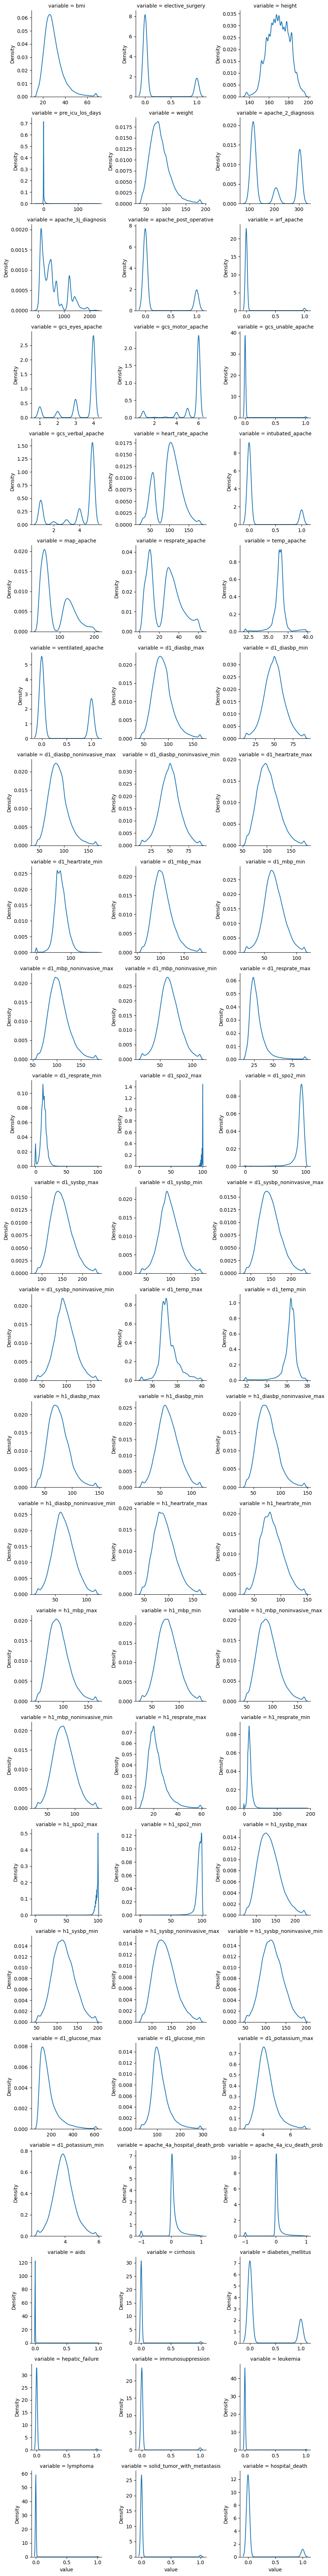

In [ ]:
unpivot = pd.melt(raw_data, raw_data.describe().columns[0], raw_data.describe().columns[1:])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

# <center> 3. Pré-processamento dos dados

**Etapas:**

Conversão de valores categóricos;
Transformação de colunas numéricas e remoção de valores nulos;

Valores nulos para *categorias* são substituídos por **mode** e aqueles para *numéricos* são substituídos por **mean**

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88284 entries, 0 to 91712
Data columns (total 78 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            84229 non-null  float64
 1   bmi                            88284 non-null  float64
 2   elective_surgery               88284 non-null  int64  
 3   ethnicity                      87073 non-null  object 
 4   gender                         88266 non-null  object 
 5   height                         88284 non-null  float64
 6   icu_type                       88284 non-null  object 
 7   pre_icu_los_days               88284 non-null  float64
 8   weight                         88284 non-null  float64
 9   apache_2_diagnosis             86718 non-null  float64
 10  apache_3j_diagnosis            87258 non-null  float64
 11  apache_post_operative          88284 non-null  int64  
 12  arf_apache                     87600 non-null  floa

In [ ]:
raw_data.nunique()[raw_data.nunique() == 2].index.tolist()

['elective_surgery',
 'gender',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'hospital_death']

In [ ]:
raw_data.select_dtypes(include='O').columns.values.tolist()

['ethnicity',
 'gender',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [ ]:
numerical_cat = [
 'elective_surgery',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

categorical = ['ethnicity',
 'gender',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem',
 'apache_3j_diagnosis',
 'apache_2_diagnosis']


Converter tipo das variáveis binárias em número Inteiros (mantendo os valores faltantes)

In [ ]:
for col in numerical_cat:
    raw_data[col] = raw_data[col].astype('Int64')

raw_data.dtypes

age                              float64
bmi                              float64
elective_surgery                   Int64
ethnicity                         object
gender                            object
height                           float64
icu_type                          object
pre_icu_los_days                 float64
weight                           float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              Int64
arf_apache                         Int64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_unable_apache                  Int64
gcs_verbal_apache                float64
heart_rate_apache                float64
intubated_apache                   Int64
map_apache                       float64
resprate_apache                  float64
temp_apache                      float64
ventilated_apache                  Int64
d1_diasbp_max                    float64
d1_diasbp_min   

Completar valores faltantes com a Moda.

In [ ]:
for col in numerical_cat:
    raw_data[col] = raw_data[col].fillna(raw_data[col].mode()[0])

In [ ]:
not_numeric = raw_data[numerical_cat + categorical + ['hospital_death']].columns.tolist()
print(not_numeric)
numeric_only = raw_data.drop(not_numeric,axis=1).columns.tolist()
print(numeric_only)

['elective_surgery', 'apache_post_operative', 'arf_apache', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'apache_3j_diagnosis', 'apache_2_diagnosis', 'hospital_death']
['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max

In [ ]:
raw_data[categorical].nunique()

ethnicity                 6
gender                    2
icu_type                  8
apache_3j_bodysystem     11
apache_2_bodysystem      10
apache_3j_diagnosis     398
apache_2_diagnosis       44
dtype: int64

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
categorical.remove('gender')
categorical.remove('apache_3j_diagnosis')
categorical.remove('apache_2_diagnosis')

In [ ]:
raw_data['gender'] = le.fit_transform(raw_data['gender'])
raw_data['apache_3j_diagnosis'] = le.fit_transform(raw_data['apache_3j_diagnosis'])
raw_data['apache_2_diagnosis'] = le.fit_transform(raw_data['apache_2_diagnosis'])

Usando o codificador ``one-hot`` devido à grande variedade de **valores exclusivos** nas categorias

In [ ]:
dummy_data = pd.get_dummies(raw_data,
    prefix='isin',
    prefix_sep='_',
    columns=categorical, # We will use a separate method for this cathegory
    drop_first=False)
dummy_data.reset_index(drop = True, inplace = True)
dummy_data

age        bmi  elective_surgery  gender  height  pre_icu_los_days  \
0      68.0  22.730000                 0       1   180.3          0.541667   
1      77.0  27.420000                 0       0   160.0          0.927778   
2      25.0  31.950000                 0       0   172.7          0.000694   
3      81.0  22.640000                 1       0   165.1          0.000694   
4      67.0  27.560000                 0       1   190.5          0.000694   
...     ...        ...               ...     ...     ...               ...   
88279  75.0  23.060250                 0       1   177.8          0.298611   
88280  56.0  47.179671                 0       0   183.0          0.120139   
88281  48.0  27.236914                 0       1   170.2          0.046528   
88282   NaN  23.297481                 0       0   154.9          0.081944   
88283  82.0  22.031250                 1       0   160.0          0.018056   

       weight  apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
0        73.9                  11                  124                      0   
1        70.2                   7                   49                      0   
2        95.3                  20                  167                      0   
3        61.7                  24                  222                      1   
4       100.0                  36                  102                      0   
...       ...                 ...                  ...                    ...   
88279    72.9                  11                  123                      0   
88280   158.0                  11                  122                      0   
88281    78.9                  21                  164                      0   
88282    55.9                   7                   49                      0   
88283    56.4                  39                  298                      1   

       arf_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0               0              3.0               6.0                  0   
1               0              1.0               3.0                  0   
2               0              3.0               6.0                  0   
3               0              4.0               6.0                  0   
4               0              4.0               6.0                  0   
...           ...              ...               ...                ...   
88279           0              4.0               6.0                  0   
88280           0              4.0               6.0                  0   
88281           0              3.0               6.0                  0   
88282           0              4.0               5.0                  0   
88283           0              4.0               6.0                  0   

       gcs_verbal_apache  heart_rate_apache  intubated_apache  map_apache  \
0                    4.0              118.0                 0        40.0   
1                    1.0              120.0                 0        46.0   
2                    5.0              102.0                 0        68.0   
3                    5.0              114.0                 1        60.0   
4                    5.0              113.0                 0       130.0   
...                  ...                ...               ...         ...   
88279                5.0              115.0                 0        48.0   
88280                5.0              100.0                 0        62.0   
88281                4.0              158.0                 0        57.0   
88282                4.0               60.0                 0        54.0   
88283                1.0              101.0                 0        56.0   

       resprate_apache  temp_apache  ventilated_apache  d1_diasbp_max  \
0                 36.0         39.3                  0           68.0   
1                 33.0         35.1                  1           95.0   
2                 37.0         36.7                  

Remoção de colunas duplicadas

In [ ]:
dummy_data.columns = [x.lower() for x in dummy_data.columns.tolist()]
print(dummy_data.shape)

(88284, 109)


In [ ]:
dummy_data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False, False,  True,  True, False,
        True])

In [ ]:
dummy_data = dummy_data.loc[:,~dummy_data.columns.duplicated()]
print(dummy_data.shape)

(88284, 103)


In [ ]:
dummy_data.dtypes

age                              float64
bmi                              float64
elective_surgery                   Int64
gender                             int64
height                           float64
pre_icu_los_days                 float64
weight                           float64
apache_2_diagnosis                 int64
apache_3j_diagnosis                int64
apache_post_operative              Int64
arf_apache                         Int64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_unable_apache                  Int64
gcs_verbal_apache                float64
heart_rate_apache                float64
intubated_apache                   Int64
map_apache                       float64
resprate_apache                  float64
temp_apache                      float64
ventilated_apache                  Int64
d1_diasbp_max                    float64
d1_diasbp_min                    float64
d1_diasbp_noninvasive_max        float64
d1_diasbp_noninv

In [ ]:
for col in tqdm(dummy_data.columns.tolist()):
    if dummy_data[col].values.dtype == 'uint8' or dummy_data[col].values.dtype == "Int64":
        dummy_data[col] = dummy_data[col].astype(int)

100%|██████████| 103/103 [00:00<00:00, 7931.94it/s]


In [ ]:
dummy_data.dtypes

age                              float64
bmi                              float64
elective_surgery                   int64
gender                             int64
height                           float64
pre_icu_los_days                 float64
weight                           float64
apache_2_diagnosis                 int64
apache_3j_diagnosis                int64
apache_post_operative              int64
arf_apache                         int64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_unable_apache                  int64
gcs_verbal_apache                float64
heart_rate_apache                float64
intubated_apache                   int64
map_apache                       float64
resprate_apache                  float64
temp_apache                      float64
ventilated_apache                  int64
d1_diasbp_max                    float64
d1_diasbp_min                    float64
d1_diasbp_noninvasive_max        float64
d1_diasbp_noninv

In [ ]:
dummy_data[numeric_only].isna().sum(axis=0).sort_values(ascending=False)

d1_potassium_min                 9053
d1_potassium_max                 9053
h1_mbp_noninvasive_min           8455
h1_mbp_noninvasive_max           8455
apache_4a_icu_death_prob         7594
apache_4a_hospital_death_prob    7594
h1_diasbp_noninvasive_max        6982
h1_diasbp_noninvasive_min        6982
h1_sysbp_noninvasive_min         6972
h1_sysbp_noninvasive_max         6972
d1_glucose_min                   5458
d1_glucose_max                   5458
h1_mbp_min                       4287
h1_mbp_max                       4287
h1_resprate_min                  4062
h1_resprate_max                  4062
age                              4055
h1_spo2_min                      3925
h1_spo2_max                      3925
temp_apache                      3884
h1_diasbp_min                    3388
h1_diasbp_max                    3388
h1_sysbp_max                     3379
h1_sysbp_min                     3379
h1_heartrate_min                 2621
h1_heartrate_max                 2621
d1_temp_max 

Vamos então selecionar aquelas variáveis que possuem mais do que 2000 valores faltantes.

In [ ]:
high_missing_data = dummy_data[numeric_only].isna().sum(axis=0).sort_values()[dummy_data[numeric_only].isna().sum(axis=0) < 2000].index.tolist()

In [ ]:
high_missing_data

['bmi',
 'height',
 'pre_icu_los_days',
 'weight',
 'd1_heartrate_min',
 'd1_heartrate_max',
 'd1_sysbp_min',
 'd1_sysbp_max',
 'd1_diasbp_min',
 'd1_diasbp_max',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_spo2_min',
 'd1_spo2_max',
 'd1_resprate_min',
 'd1_resprate_max',
 'heart_rate_apache',
 'map_apache',
 'd1_sysbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'resprate_apache',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache']

In [ ]:
dummy_data.shape

(88284, 103)

Para fazer a imputação utilizando a média, substituir próxima célula com:
```[python]
for col in high_missing_data:
    dummy_data[col] = dummy_data[col].fillna(dummy_data[col].mean())
```

Ou utilizar o [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) do scikit-learn.

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=10)

In [ ]:
dummy_data[high_missing_data] = imputer.fit_transform(dummy_data[high_missing_data])

Descartar observações que contém NAs.

In [ ]:
process_data = dummy_data.dropna(axis=0)

In [ ]:
process_data.shape

(58744, 103)

In [ ]:
process_data.columns.to_list()

['age',
 'bmi',
 'elective_surgery',
 'gender',
 'height',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mb

# Modelagem e Predição

In [ ]:
X = process_data.drop(['hospital_death'], axis=1)
y = process_data['hospital_death']

In [ ]:

n_feat=X.columns.value_counts().sum()

#X_new = X[['apache_4a_hospital_death_prob','apache_4a_icu_death_prob','age','d1_spo2_min','d1_resprate_max','d1_heartrate_min']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=11,
                                                    stratify = y)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(41120, 102)
(41120,)


In [ ]:
# Vamos criar primeiro uma tabela para armazenar os resultados de vários modelos

evaluation_results = pd.DataFrame(np.zeros((2,5)), \
                                  columns=['Accuracy', 'Precision','Recall',\
                                           'F1-score','AUC-ROC score'])

evaluation_results.index=['Logistic Regression (LR)', 'Neural Network (NN)']#,'Decision Tree Classifier (DT)',\
                          #'Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',\
                         #'Support Vector Machine (SVM)','K-Nearest Neighbours (KNN)']
evaluation_results

Accuracy  Precision  Recall  F1-score  AUC-ROC score
Logistic Regression (LR)       0.0        0.0     0.0       0.0            0.0
Neural Network (NN)            0.0        0.0     0.0       0.0            0.0

In [ ]:
# Vamos definir funções para resumir as pontuações das previsões .

def classification_summary(y_test, pred, pred_prob, i):
    evaluation_results.iloc[i]['Accuracy']=round(accuracy_score(y_test, pred),3)*100
    evaluation_results.iloc[i]['Precision']=round(precision_score(y_test, pred, average='weighted'),3)*100 #
    evaluation_results.iloc[i]['Recall']=round(recall_score(y_test, pred, average='weighted'),3)*100 #
    evaluation_results.iloc[i]['F1-score']=round(f1_score(y_test, pred, average='weighted'),3)*100 #
    evaluation_results.iloc[i]['AUC-ROC score']=round(roc_auc_score(y_test, pred_prob[:,1], multi_class='ovr'),3)*100 #[:, 1]
    print('{}{}\033[1m Avaliando {} \033[0m{}{}\n'.format('<'*3,'-'*3,evaluation_results.index[i], '-'*3,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusuion Matrix:\033[0m\n',confusion_matrix(y_test, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))

    auc_roc(y_test, pred_prob, curves=['each_class'])
    plt.show()


## Neural Network

In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# Neural network
model = Sequential()
model.add(Dense(n_feat, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(n_feat//2, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.00001)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=10, batch_size=64)

Epoch 1/10
643/643 [==============================] - 3s 3ms/step - loss: 2.6169 - accuracy: 0.8588 - val_loss: 1.5616 - val_accuracy: 0.9129
Epoch 2/10
643/643 [==============================] - 2s 3ms/step - loss: 1.8841 - accuracy: 0.8558 - val_loss: 1.1184 - val_accuracy: 0.9118
Epoch 3/10
643/643 [==============================] - 2s 3ms/step - loss: 1.5949 - accuracy: 0.8573 - val_loss: 0.9186 - val_accuracy: 0.9103
Epoch 4/10
643/643 [==============================] - 2s 4ms/step - loss: 1.3380 - accuracy: 0.8593 - val_loss: 0.7521 - val_accuracy: 0.9093
Epoch 5/10
643/643 [==============================] - 1s 2ms/step - loss: 1.1578 - accuracy: 0.8587 - val_loss: 0.6516 - val_accuracy: 0.9072
Epoch 6/10
643/643 [==============================] - 2s 2ms/step - loss: 1.0025 - accuracy: 0.8625 - val_loss: 0.5393 - val_accuracy: 0.8999
Epoch 7/10
643/643 [==============================] - 1s 2ms/step - loss: 0.9006 - accuracy: 0.8632 - val_loss: 0.4999 - val_accuracy: 0.9030
Epoch 

In [ ]:
#model.evaluate(x=X_test,y=y_test)
pred_prob = model.predict(X_test)
ypred = pred_prob.round().astype('int')

551/551 [==============================] - 1s 1ms/step


In [ ]:
pred = list()
pred.append(pred_prob)

In [ ]:
pred.append(1-pred_prob)
pred = np.array(pred).reshape((pred_prob.shape[0], 2))

<<<--- Avaliando Neural Network (NN) --->>>

Accuracy = 90.3%
F1 Score = 88.3%

 Confusuion Matrix:
 [[15717   377]
 [ 1331   199]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     16094
         1.0       0.35      0.13      0.19      1530

    accuracy                           0.90     17624
   macro avg       0.63      0.55      0.57     17624
weighted avg       0.87      0.90      0.88     17624



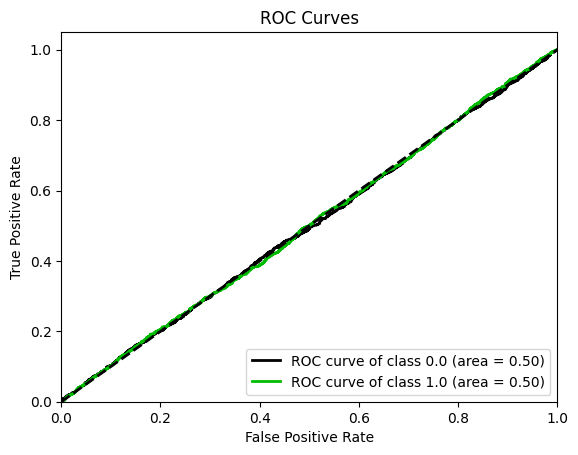

In [ ]:
classification_summary(y_test, ypred, pred, 1)

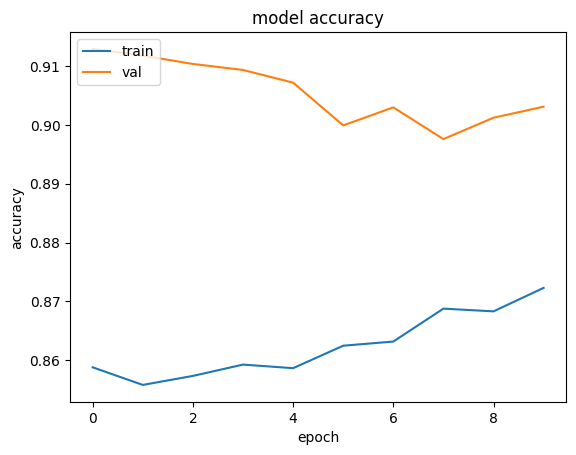

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

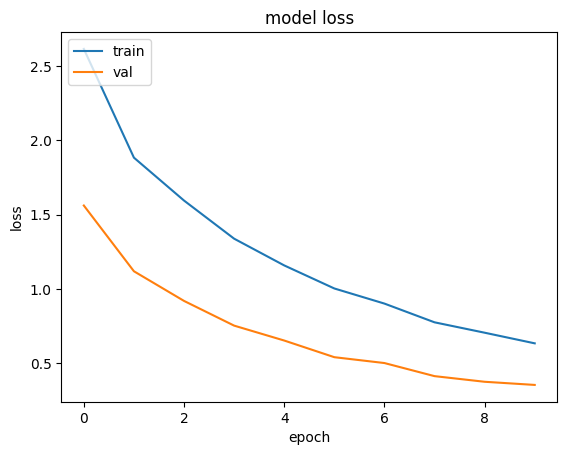

In [ ]:
#plt.plot(figsize=(12,12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

## Logistic Regression

In [ ]:
# X = icu_data.drop(['hospital_death'], axis=1)
# y = icu_data['hospital_death']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
#                                                     random_state=11,
#                                                     stratify = y)

## Ajuste de hyperparâmetros

In [ ]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

LR_model = LogisticRegression()

# A parameter grid for Logistic Regression
params = dict()
params['solver'] = ['liblinear']
# params['penalty'] = ['l1', 'l2']
# params['C'] = [1,2,3,4,5]


gsearch = GridSearchCV(
    estimator=LR_model,
    param_grid=params,
    scoring='roc_auc',
    n_jobs=-1,
    cv=gkf
)

lr_model = gsearch.fit(X=X_train, y=y_train)
print(lr_model)
(gsearch.best_params_, gsearch.best_score_)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7a0e1a382e30>,
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'solver': ['liblinear']}, scoring='roc_auc')


({'solver': 'liblinear'}, 0.8597503300633725)

## Avaliação do modelo tunado

In [ ]:
lr_tuned = lr_model.best_estimator_.fit(X_train, y_train)

In [ ]:
ypred = lr_tuned.predict(X_test)
pred_prob = lr_tuned.predict_proba(X_test)

In [ ]:
print(pred_prob)

[[0.97317316 0.02682684]
 [0.81238388 0.18761612]
 [0.53840553 0.46159447]
 ...
 [0.96717693 0.03282307]
 [0.92943918 0.07056082]
 [0.92762107 0.07237893]]


<<<--- Avaliando Logistic Regression (LR) --->>>

Accuracy = 92.4%
F1 Score = 90.8%

 Confusuion Matrix:
 [[15884   210]
 [ 1137   393]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     16094
         1.0       0.65      0.26      0.37      1530

    accuracy                           0.92     17624
   macro avg       0.79      0.62      0.66     17624
weighted avg       0.91      0.92      0.91     17624



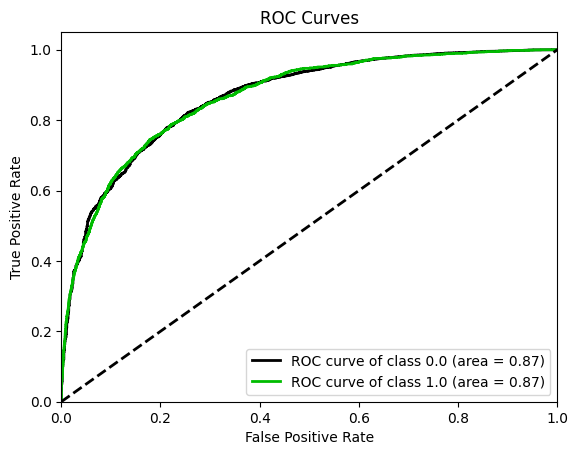

In [ ]:
classification_summary(y_test, ypred, pred_prob, 0)

## **Observações e exercícios:**

- Vimos como é importante compreender os dados do nosso problema, trazendo insights a respeito de todo o pipeline para a tarefa alvo;<br>
<br>
- Neste exemplo não foram empregadas diversas técnicas, como por exemplo, a normalização dos dados, aumento ou diminuição de dados (sub/over-sampling + SMOTE), técnicas de encoding (LabelBinarizer(), LabelEncoder(), OrdinalEncoder()), seleção de atributos, etc;<br>
<br>
- As técnicas previamente citadas podem, e devem, ser utilizadas para mitigar os pontos fracos, como por exemplo colinearidade entre atributos, o desbalanceamento de classes, problema com variáveis categóricas e numéricas, etc;<br>
<br>
- Portanto, precisamos definir de forma assertiva o pipeline da tarefa, a fim de tratar os problemas e construir um modelo robusto e eficaz;<br>
<br>
- Vale ressaltar que nem sempre um modelo complexo é melhor que um mais simples: NN vs.RL.<br>
<br>